### Project: Predicting the probability that a customer will buy a personal loan

 - **Objective:**
The primary objective of this project was to apply Decision Tree and various ensemble learning techniques (such as Bagging, Random Forest, AdaBoost, and XGBoost) to predict the likelihood that a customer will purchase a personal loan. By accurately identifying potential loan customers, the bank could:

   - Optimize marketing efforts by targeting the most promising customers.

   - Improve conversion rates by focusing resources on customers with a higher probability of acceptance.

   - Minimize campaign costs by reducing spending on customers unlikely to respond.

   - This predictive approach would ultimately enhance customer acquisition strategies and support data-driven decision-making in financial marketing campaigns.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv("Bank_Loan.csv", delimiter=";")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,"1,60",1,0,0,1,0,0,0
1,2,45,19,34,90089,3,"1,50",1,0,0,1,0,0,0
2,3,39,15,11,94720,1,"1,00",1,0,0,0,0,0,0
3,4,35,9,100,94112,1,"2,70",2,0,0,0,0,0,0
4,5,35,8,45,91330,4,"1,00",2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,"1,90",3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,"0,40",1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,"0,30",3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,"0,50",2,0,0,0,0,1,0


#### Dataset and features description

The dataset consists of **5000 customers** and includes **12 predictor variables** and **1 response variable**.  

### Variables

| **Variable**             | **Description**                                                                 |
|---------------------------|-------------------------------------------------------------------------------|
| **AGE**                   | Age of the customer in years                                                  |
| **Experience**            | Number of years of work experience                                           |
| **Income**                | Annual income in thousands                                                   |
| **ZIPCODE**               | Postal code of the client                                                    |
| **Family**                | Number of family members                                                     |
| **CCAVG**                 | Average monthly spending on credit cards (in thousands)                      |
| **Education**             | Education level: 1 = Bachelor's, 2 = Master's, 3 = Advanced/Professional     |
| **Mortgage**              | Value of home mortgage, if any (in thousands)                                |
| **Securities Account**    | Whether the customer has a securities account with the bank (Yes/No)         |
| **CD Account**            | Whether the customer has a certificate of deposit (CD) account (Yes/No)      |
| **Online**                | Whether the customer uses internet banking facilities (Yes/No)               |
| **CreditCard**            | Whether the customer uses a credit card issued by the bank (Yes/No)          |
| **Personal Loan**         | **Response variable** – Whether the customer accepted the personal loan in the last campaign (Yes/No) |


#### Exploratory Data analysis

#### Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [7]:
# Check for duplicates in the entire DataFrame
duplicates = df.duplicated()
# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

# Display the duplicate rows, if any
if duplicates.sum() > 0:
    print("Duplicate rows:")
    print(df[duplicates])
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


In [8]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [9]:
# Drop ID columns
df = df.drop(columns=["ID"])

In [10]:
# Checking for missing values in the dataset 
df.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


The descriptive statistics above shows potential anomalies in Experience variable which contains negative values

In [12]:
# The variable Experience contained a negative values which is inappropriate
df[df['Experience']<0]['Experience'].count()

52

In [13]:
# Checking the number of negative valuues in the experience variable
df[df['Experience']<0]['Experience'].value_counts()

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64

In [14]:
# Changing the negative values into positive values
df['Experience'] = df['Experience'].apply(abs)

#### Checking the distributions of the quantitative variables

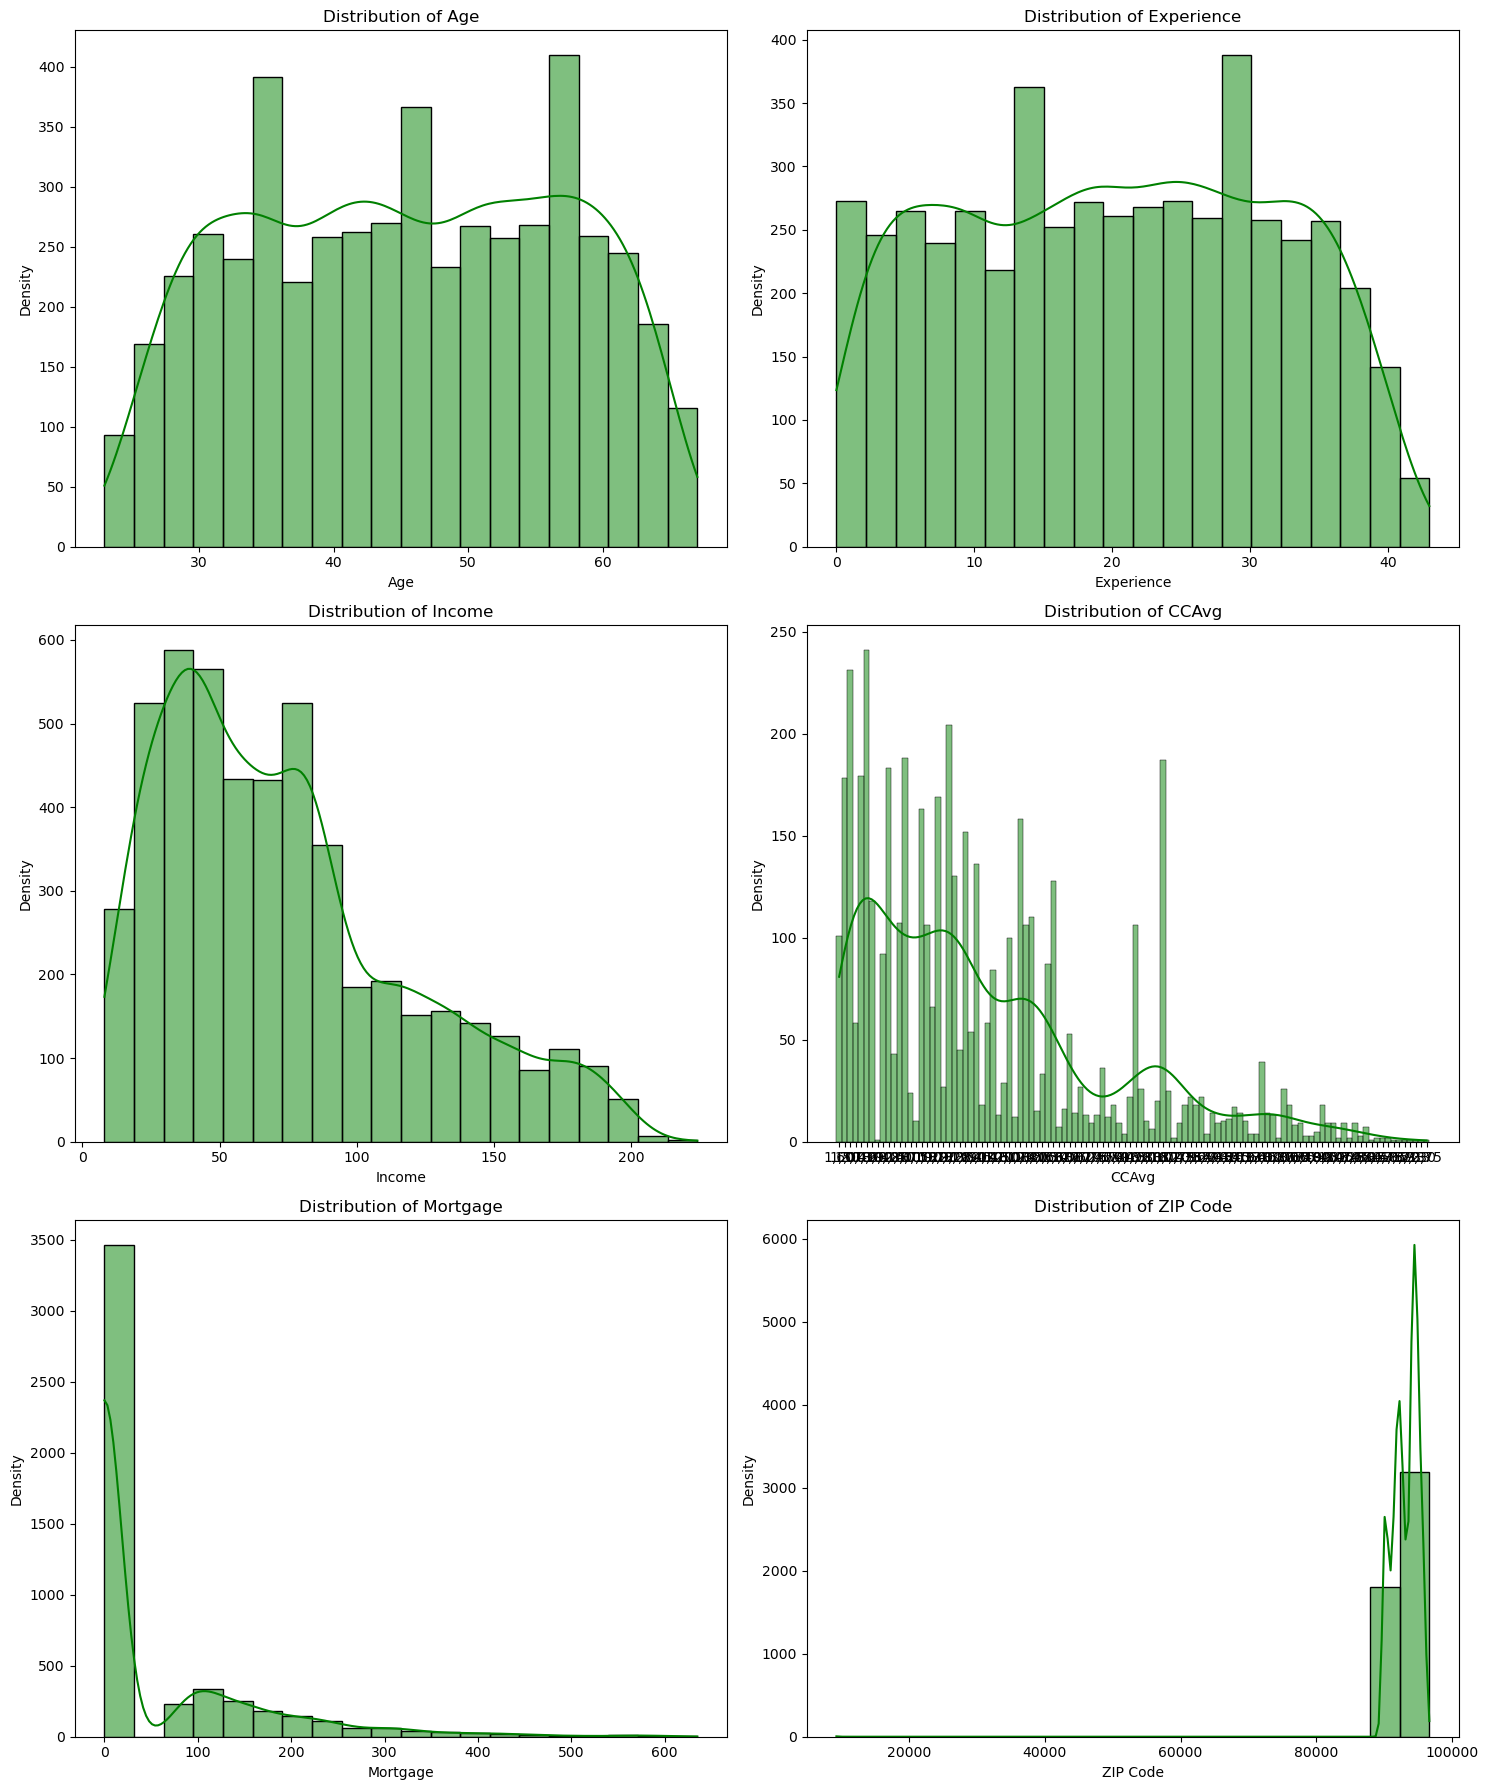

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical variables
numerical = df[["Age", "Experience", "Income", "CCAvg", "Mortgage","ZIP Code"]]

# Calculate the number of rows and columns needed
num_vars = len(numerical.columns)
num_cols = 2
num_rows = (num_vars + num_cols - 1) // num_cols  # ceiling division

# Plot histograms for all numerical features
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 6))

for i, var in enumerate(numerical):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data=df, x=var, kde=True, color='green', bins=20, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Density')

# Remove empty subplots if any
if num_vars % num_cols != 0:
    fig.delaxes(axes.flatten()[num_vars])

# Adjust layout
plt.tight_layout()
plt.show()


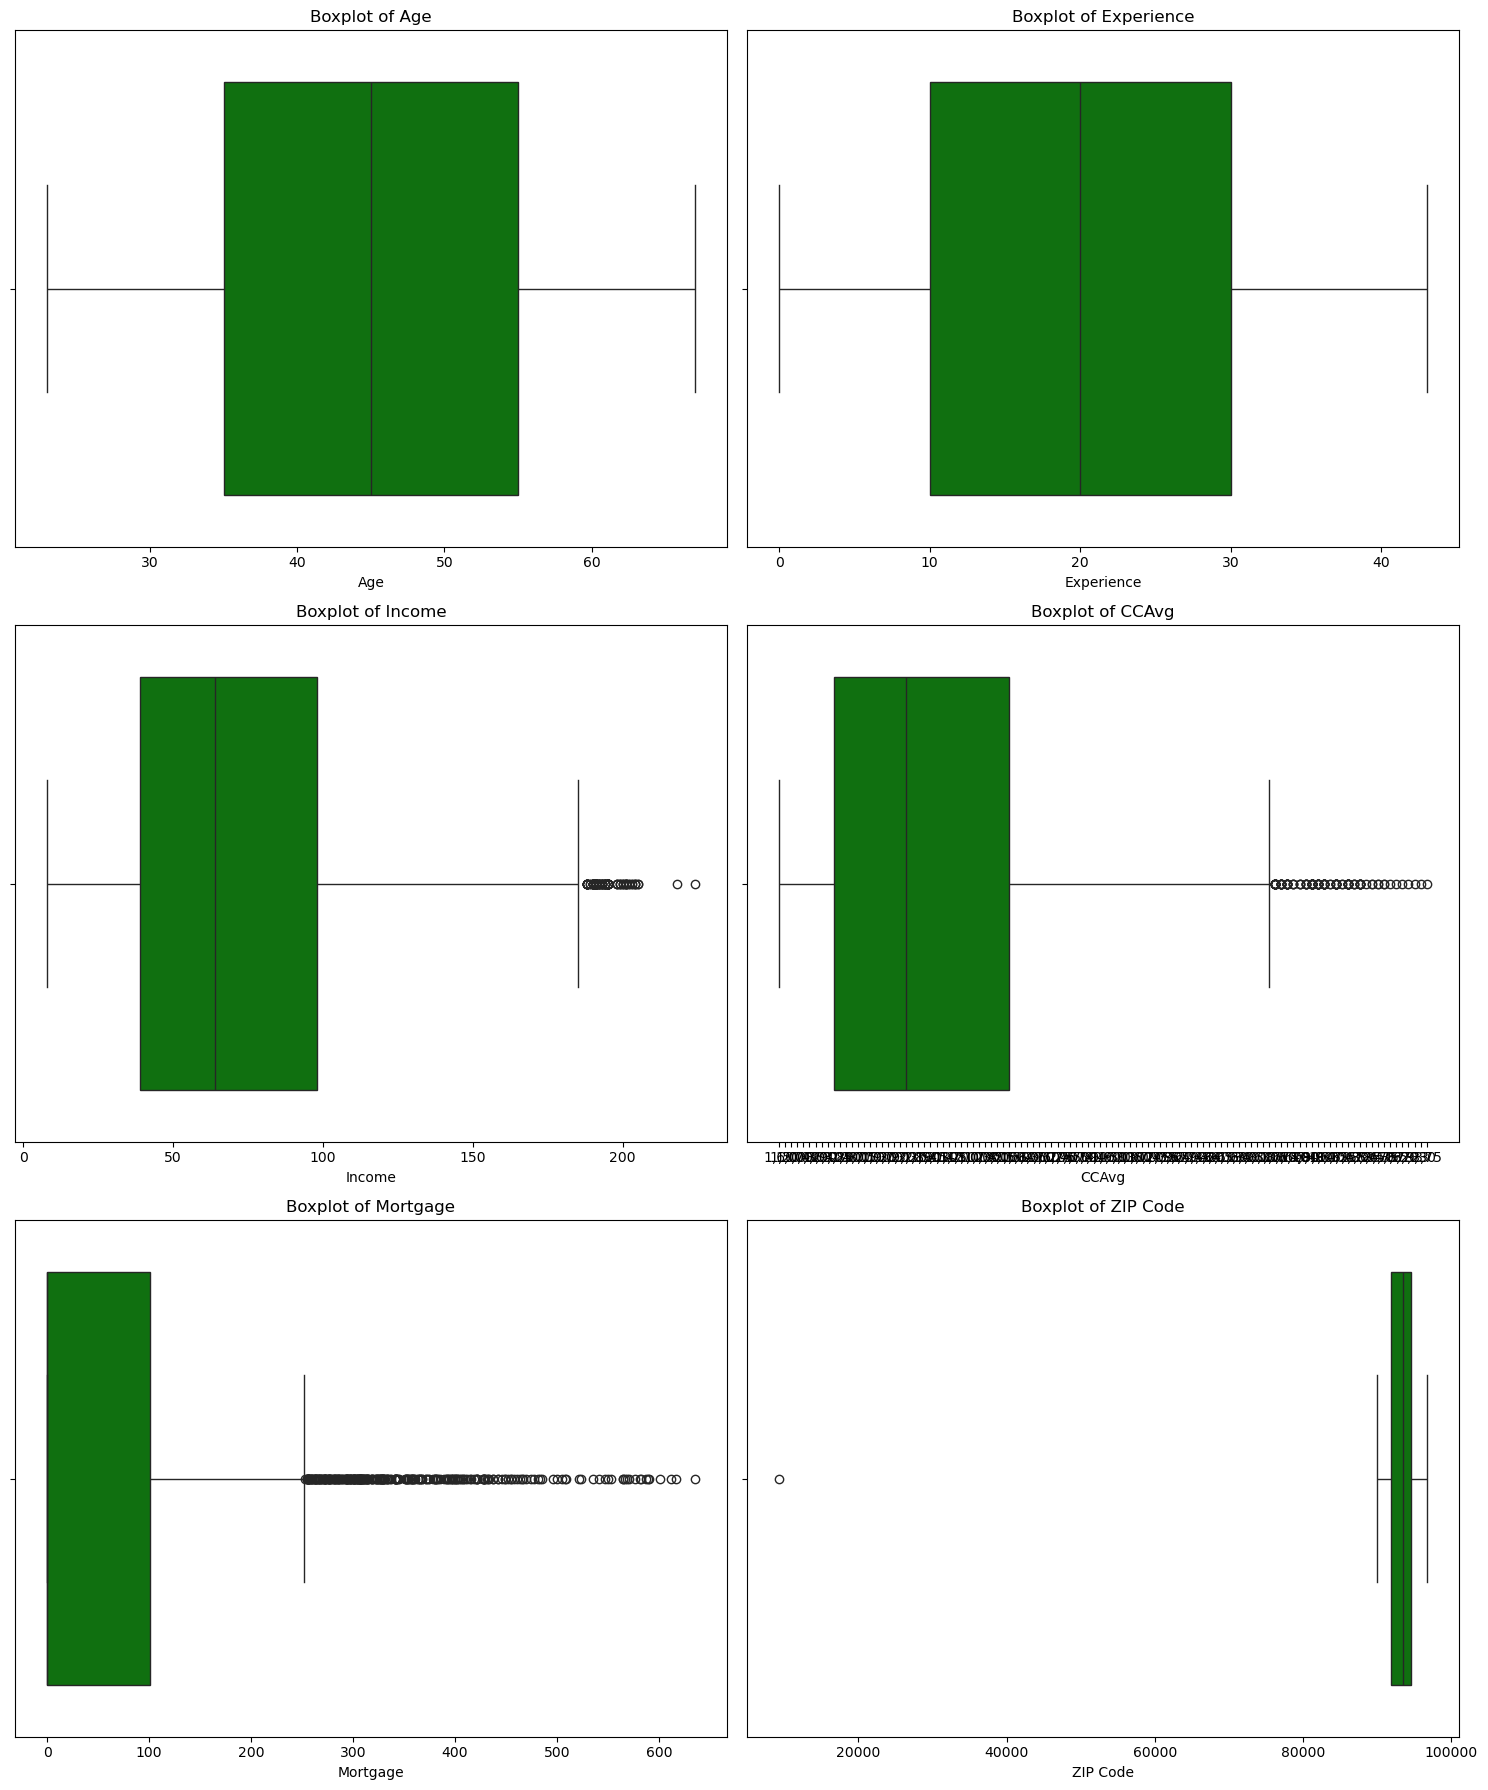

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical variables
numerical = df[["Age", "Experience", "Income", "CCAvg", "Mortgage","ZIP Code"]]

# Calculate the number of rows and columns needed
num_vars = len(numerical.columns)
num_cols = 2  # You want 2 columns
num_rows = (num_vars + num_cols - 1) // num_cols  # ceiling division

# Plot boxplots for all numerical features
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 6))

# Flatten axes array for easy iteration in case of single row
axes = axes.flatten()

for i, var in enumerate(numerical.columns):
    sns.boxplot(data=df, x=var, color='green', ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')
    axes[i].set_xlabel(var)

# Remove empty subplots if the number of variables is odd
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


- **Numerical variables interpretations Distribution of Age** Customers range from 23 to 67 years old, with an average age of 45.34 years. The age distribution is roughly uniform with some peaks at specific levels, with most customers falling between 35 and 55 years old. The distribution is fairly spread out with a standard deviation of 11.46 years.

- **Distribution of experience** Similar to age, experience has a fairly uniform distribution but with noticeable peaks which ranges from 0 to 43 years. The average years of experience is 20 years. Standard deviation is 11.42 years, indicating a broad range of experience levels.

- **Distribution of Income** The income distribution is right-skewed, with a majority of customers having an income below 100,000. The average income of customers is 73,77 thousands and A high standard deviation of 46.03 thousand shows significant variability in income.

- **Distribution of Mortage** The mortgage distribution is highly right-skewed, with most customers having no mortgage indicating that while some customers have substantial mortgages, most have little to none. There are significant spikes at higher values, indicating the presence of outliers which needs to be handled.

- **Distribution of ZipCode** The distribution of zipcode is highly left skewed which shows a noise. In ZIP code data, noise refers to values that do not conform to the expected format or range, potentially due to data entry errors or anomalies

- **Distribution of CCAVG** The distribution is heavily right-skewed, with most customers having low average monthly credit card spending.This skewness suggests that while some customers spend a lot on credit cards, the majority do not.

In [18]:
# Handling a noise observation in Zipcode
df.drop(df[df['ZIP Code']<20000].index, inplace=True)
df.reset_index(drop=True, inplace =True)

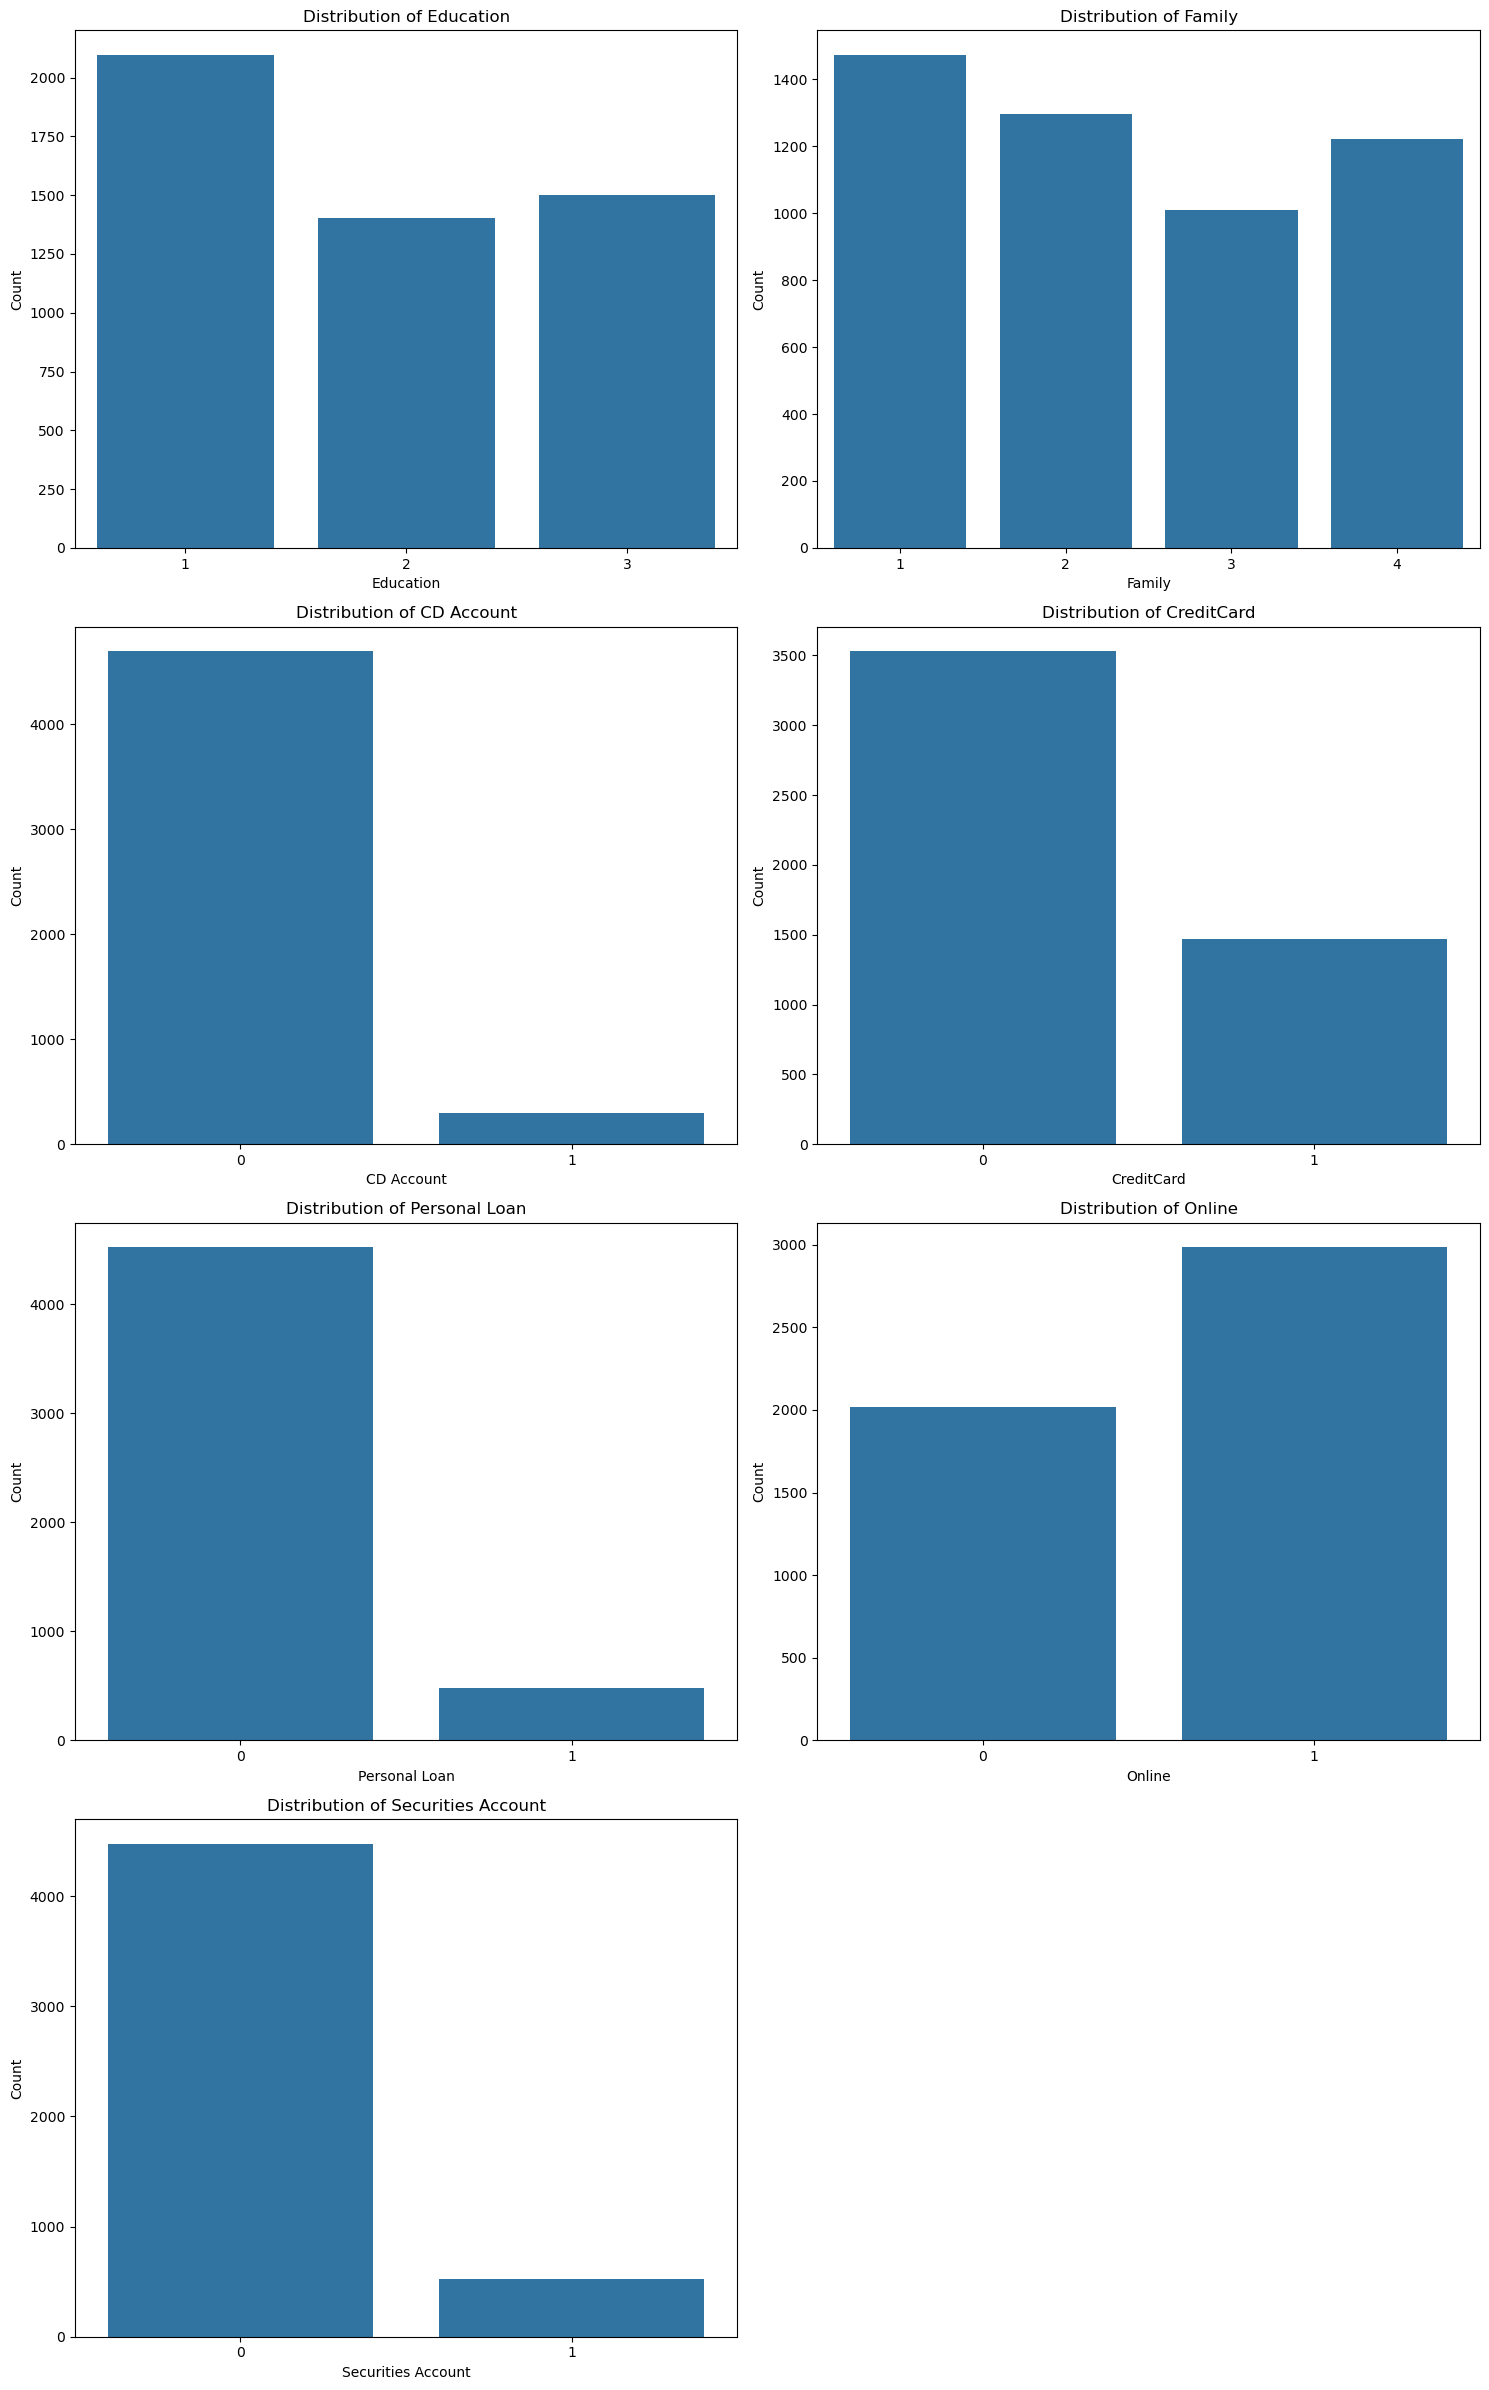

In [19]:
# Plotting a bar plot to visualize the distribution of categorical variables
categorical = df[["Education", "Family", "CD Account", "CreditCard", "Personal Loan", "Online", "Securities Account"]]

# Calculate the number of rows and columns needed
num_vars = len(categorical.columns)
num_cols = 2
num_rows = (num_vars + num_cols - 1) // num_cols  # ceiling division

# Plot bar plots for all categorical features
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 6))

for i, var in enumerate(categorical):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(data=df, x=var, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Count')

# Remove empty subplots if any
if num_vars % num_cols != 0:
    fig.delaxes(axes.flatten()[num_vars])

# Adjust layout
plt.tight_layout()
plt.show()

#### Handling outliers

In [22]:
# Identifying outliers
import numpy as np
import pandas as pd

def z_score_outliers(data, threshold=3):
    """
    Identify outliers in a Series using the Z-score method.
    
    Parameters:
    data (pd.Series): The data to check for outliers.
    threshold (float): The Z-score threshold to use for identifying outliers.
    
    Returns:
    pd.Series: A boolean Series indicating outliers.
    """
    z_scores = (data - data.mean()) / data.std()
    return np.abs(z_scores) > threshold



# Ensure the columns are numeric
df['Mortgage'] = pd.to_numeric(df['Mortgage'], errors='coerce')
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

# Identify outliers using Z-score method
outliers_Mortgage = z_score_outliers(df['Mortgage'])
outliers_Income = z_score_outliers(df['Income'])


# Summarize outliers
print(f"Number of outliers in Mortgage: {outliers_Mortgage.sum()}")
print(f"Number of outliers in Income: {outliers_Income.sum()}")

Number of outliers in Mortgage: 105
Number of outliers in Income: 2


In [23]:
# Remove outliers in Mortgage
df_cleaned = df[~outliers_Mortgage]

# Print the number of rows in the cleaned DataFrame
print(f"Number of rows after removing Mortgage outliers: {len(df_cleaned)}")

Number of rows after removing Mortgage outliers: 4894


In [24]:
#Replacing commas with periods in the 'CCAvg' column
df_cleaned.loc[:, 'CCAvg'] = df_cleaned['CCAvg'].apply(lambda x: x.replace(',', '.'))
df_cleaned

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4995,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4996,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4997,65,40,49,90034,3,0.50,2,0,0,0,0,1,0


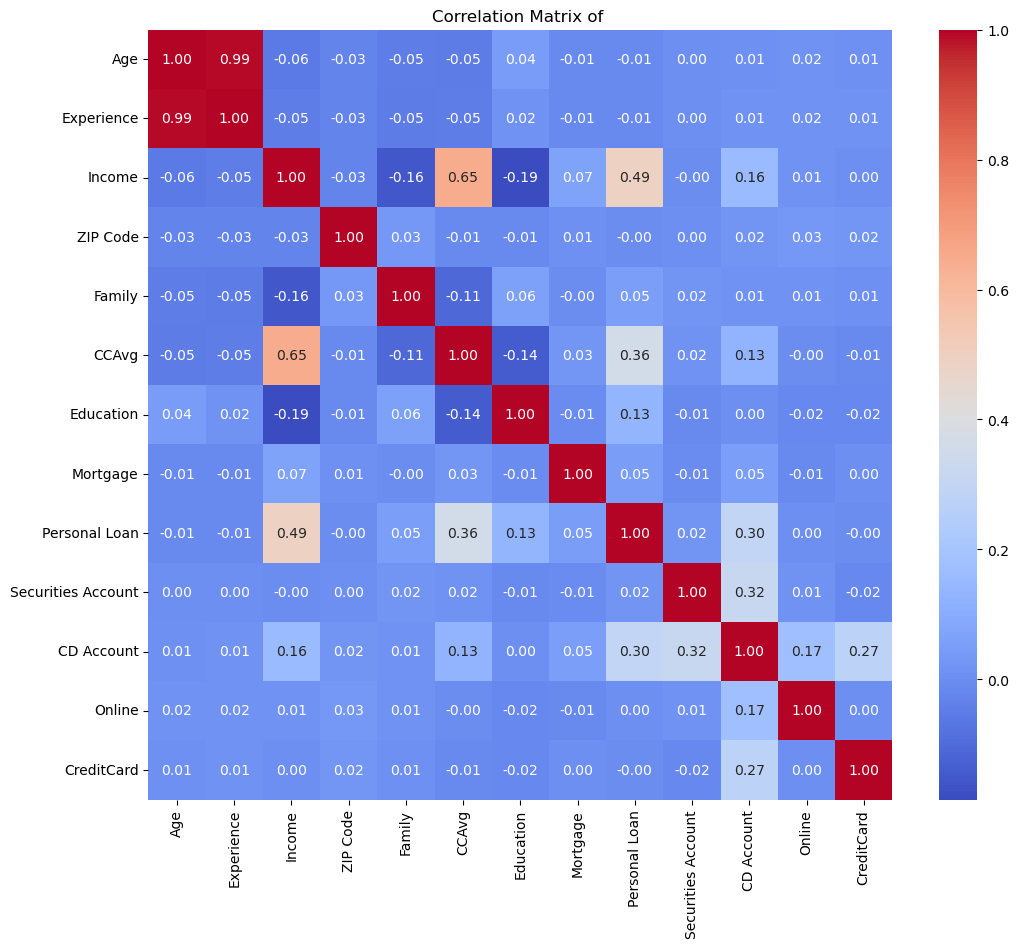

In [25]:
# Compute correlation matrix
corr_matrix = df_cleaned.corr()

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of ')
plt.show()

From the above matrix, there is a problem of multicollinearity as Age is highly correlated with experiance with a correlation coefficient of 0.99 As a result one of the variable has to be removed as multicollinearity is a problem in Logistic Regression

#### Exploring the relationship between categorical variables and target variable

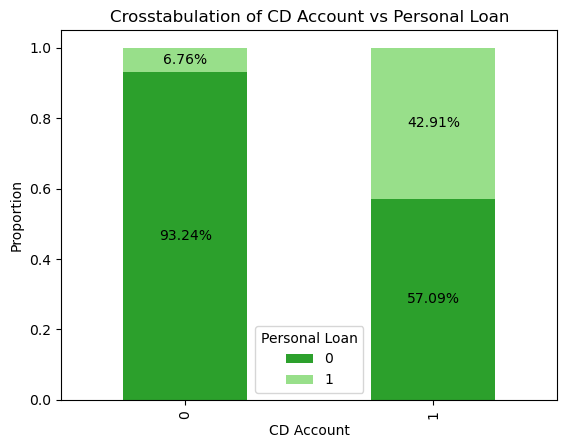

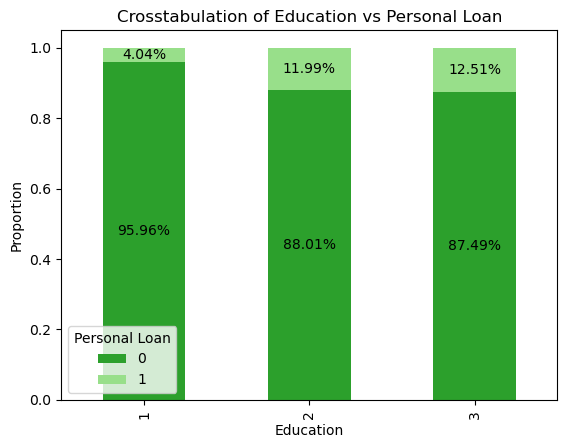

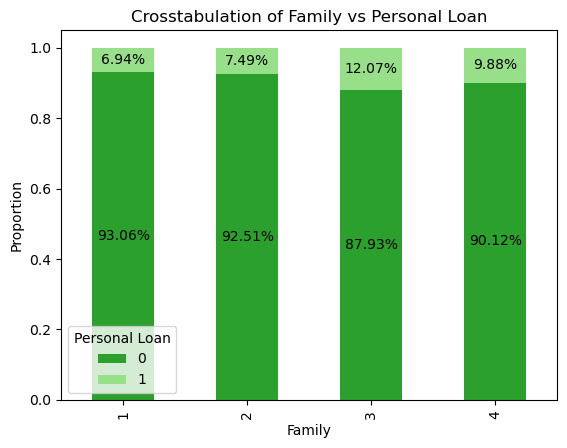

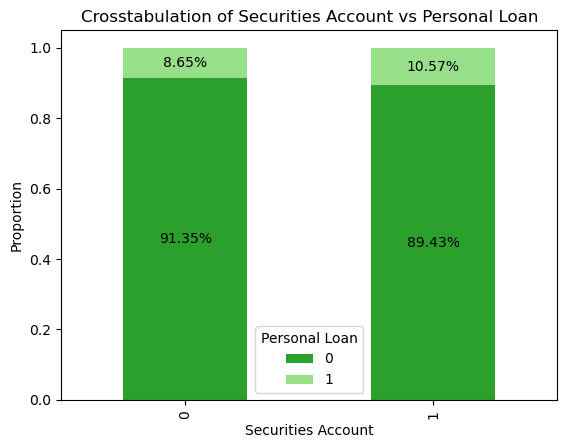

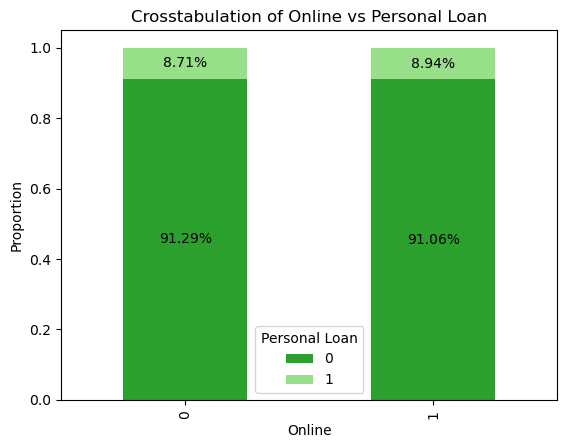

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# List of categorical features
Categorical = ['CD Account', 'Education', 'Family', 'Securities Account', 'Online']

# Target feature
Target = 'Personal Loan'

# Crosstabulation and plotting
for feature in Categorical:
    crosstab = pd.crosstab(df_cleaned[feature], df_cleaned[Target], normalize='index')
    
    # Define colors for each target class
    colors = ['#2ca02c', '#98df8a']  # dark green for 0, light green for 1
    
    crosstab.plot(kind='bar', stacked=True, color=colors)
    
    plt.title(f'Crosstabulation of {feature} vs {Target}')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.legend(title=Target)
    
    # Annotate the bars with percentage values
    for i, bars in enumerate(plt.gca().patches):
        height = bars.get_height()
        plt.gca().text(
            bars.get_x() + bars.get_width() / 2,
            bars.get_y() + height / 2,
            f'{height:.2%}',
            ha='center',
            va='center'
        )
    
    plt.show()


**Intepretation of crosstabulation results**

* Customers with a CD (Certificate of Deposit) account are more likely to buy personal loans. The variable suggests a correlation between having a CD account and the likelihood of taking a personal loan.
  
* Higher education levels correlate with a higher likelihood of buying personal loans.
* The number of family members does not significantly affect the probability of buying personal loans. This variable might not add predictive power to the model and could potentially be excluded to simplify the model.
* Having a securities account does not influence the probability of buying a personal loan.
* Using internet banking does not seem to influence the probability of buying a personal loan. Using a credit card does not appear to impact the likelihood of purchasing a personal loan.
Conclusion The cross-tabulation analysis provides valuable insights into which features are likely to influence the probability of buying a personal loan. By focusing on significant features like CD Account and Education Level and excluding potentially insignificant ones, we can build a more robust and interpretable Logistic Regression model

#### Exploring the relationship between numerical features

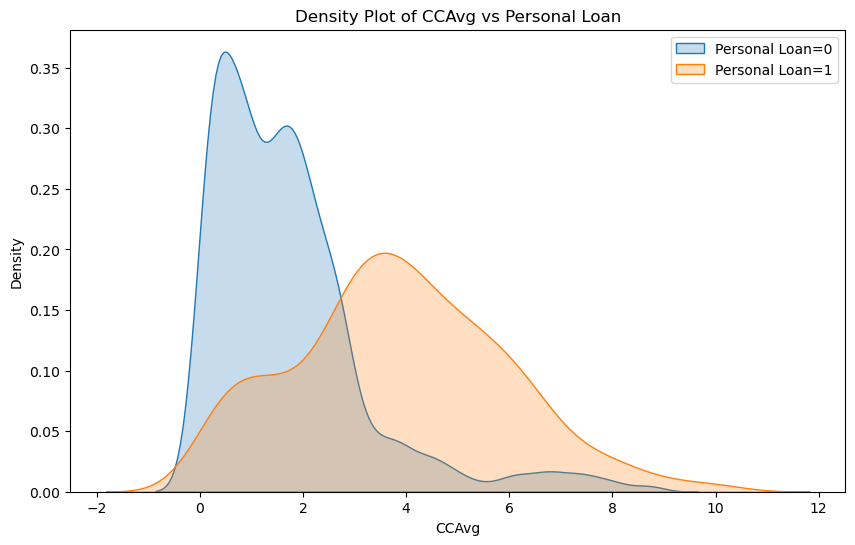

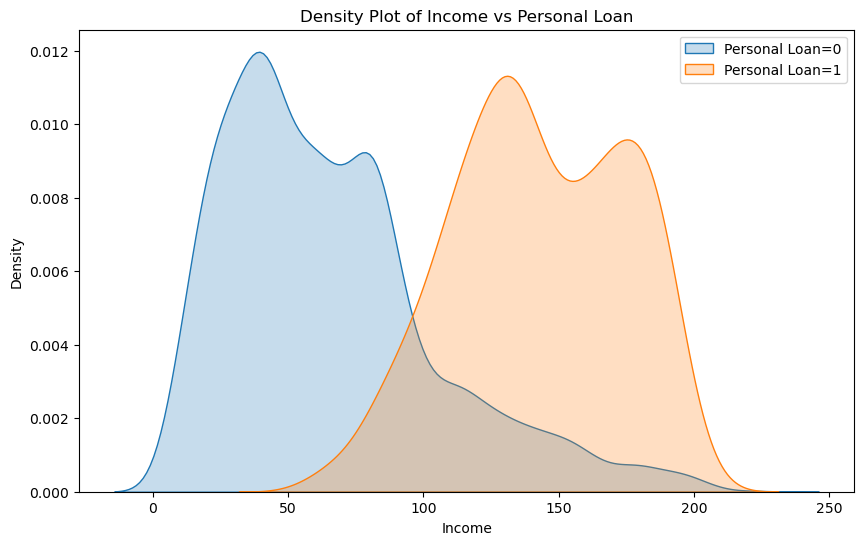

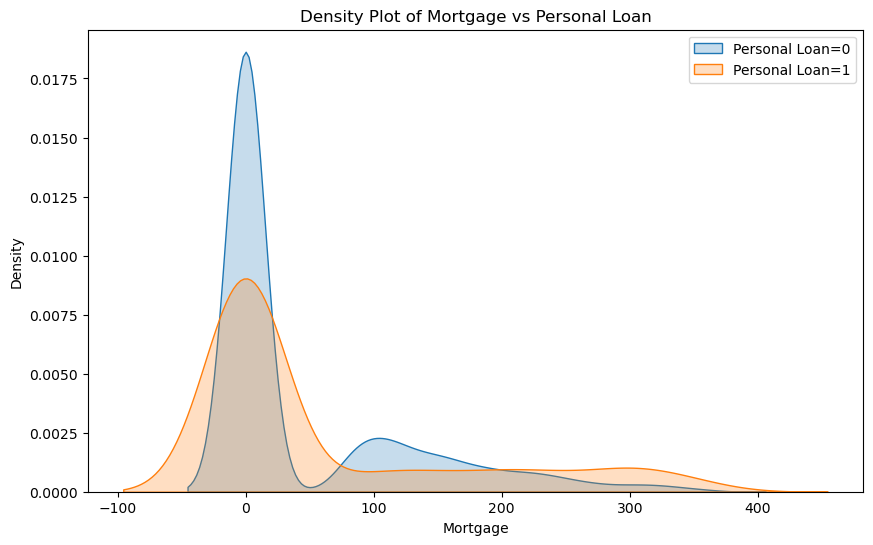

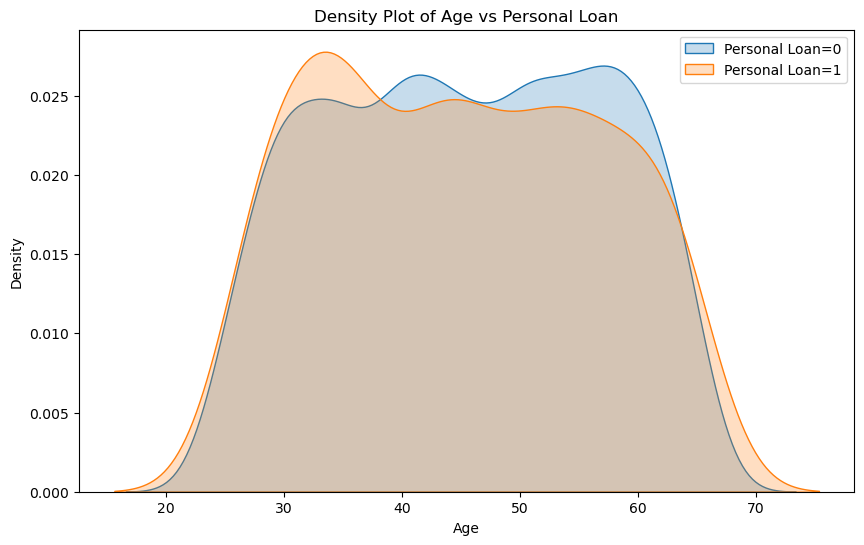

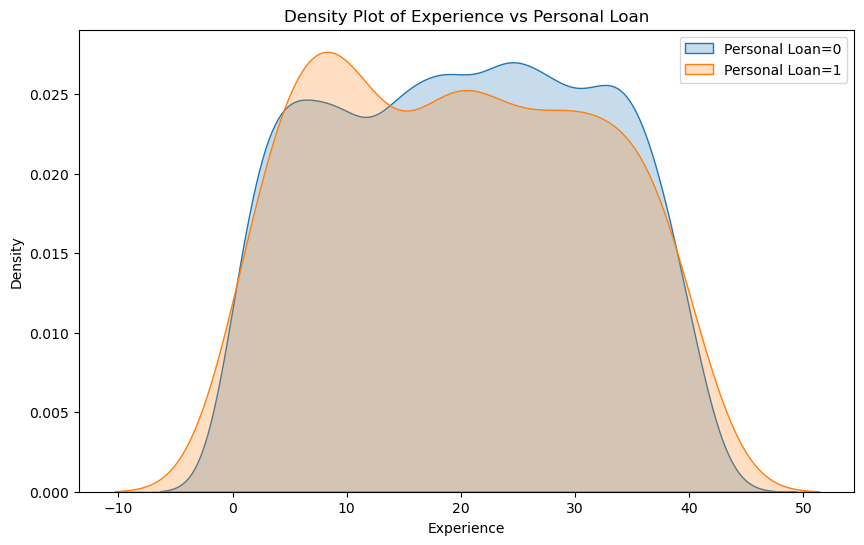

In [31]:
# List of numerical features
Num_Features = ['CCAvg', 'Income', 'Mortgage', 'Age', 'Experience']

# Density plots for numerical features
for feature in Num_Features:
    plt.figure(figsize=(10, 6))
    
    # Ensure the feature is treated as numeric without SettingWithCopyWarning
    df_cleaned.loc[:, feature] = pd.to_numeric(df_cleaned[feature], errors='coerce')
    
    # Plot density plot for each class in the target feature
    for label in df_cleaned[Target].unique():
        subset = df_cleaned[df_cleaned[Target] == label]
        sns.kdeplot(subset[feature], label=f'{Target}={label}', fill=True)
    
    plt.title(f'Density Plot of {feature} vs {Target}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

**Interpretations**

Customers with lower average monthly credit card spending are less likely to take a personal loan. The density of Personal Loan=0 is higher for lower CCAvg values. Customers with higher average monthly credit card spending are more likely to take a personal loan. The density of Personal Loan=1 is higher for higher CCAvg values. *The density is highest around the mortgage value of 0, indicating that most customers without a personal loan have no mortgage. The density decreases significantly as the mortgage value increases Customers with low or no mortgage values are less likely to take a personal loan, as indicated by the higher density of Personal Loan=0 compared to Personal Loan=1.As the mortgage value increases, the likelihood of taking a personal loan slightly increases, but both groups have relatively low densities at higher mortgage values. *Customers with lower income are less likely to take a personal loan. The density of Personal Loan=0 is higher for lower income values.Customers with higher income are more likely to take a personal loan. The density of Personal Loan=1 is higher for higher income values.

### Feature engineering

In [33]:
# Create dummy variables for education variable
data = pd.get_dummies(df_cleaned, columns=['Education',], dtype=int)

In [34]:
# Creating the interaction variable: Income per family member
data['Income_per_Family'] = data['Income'] / data['Family']

In [35]:
# Remove the variable "Experiance" because its highly correlated with Age
data.drop('Experience', axis=1, inplace=True)

#### Train test split

In [37]:
x = data.drop('Personal Loan', axis=1)
y = data['Personal Loan']

# Split the original data into training+test and validation sets (80-20 split)
x_train_test, x_val, y_train_test, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Further divide the training+test set into separate training and test sets (75-25 split)
x_train, x_test, y_train, y_test = train_test_split(x_train_test, y_train_test, test_size=0.25, random_state=42)

# Percentage of training data: 60%
# Percentage of validation data : 20%
# Percentage of testing data : 20%

# Display the target counts for each set
print("Training set target counts:")
print(y_train.value_counts())

print("\nValidation set target counts:")
print(y_val.value_counts())

print("\nTesting set target counts:")
print(y_test.value_counts())

Training set target counts:
Personal Loan
0    2676
1     260
Name: count, dtype: int64

Validation set target counts:
Personal Loan
0    894
1     85
Name: count, dtype: int64

Testing set target counts:
Personal Loan
0    891
1     88
Name: count, dtype: int64


#### Handling Class Imbalance

In [38]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
x_train_smote,y_train_smote= smote.fit_resample(x_train,y_train)

In [39]:
# Check the distribution of the target variable in the resampled training set
print(f'Distribution of target variable in the original training set: \n{y_train.value_counts()}')
print(f'Distribution of target variable in the resampled training set: \n{y_train_smote.value_counts()}')

Distribution of target variable in the original training set: 
Personal Loan
0    2676
1     260
Name: count, dtype: int64
Distribution of target variable in the resampled training set: 
Personal Loan
0    2676
1    2676
Name: count, dtype: int64


### Model Building

### Decision tree

In [41]:
# Fit decision tree to get feature importances
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

### Feature Selection

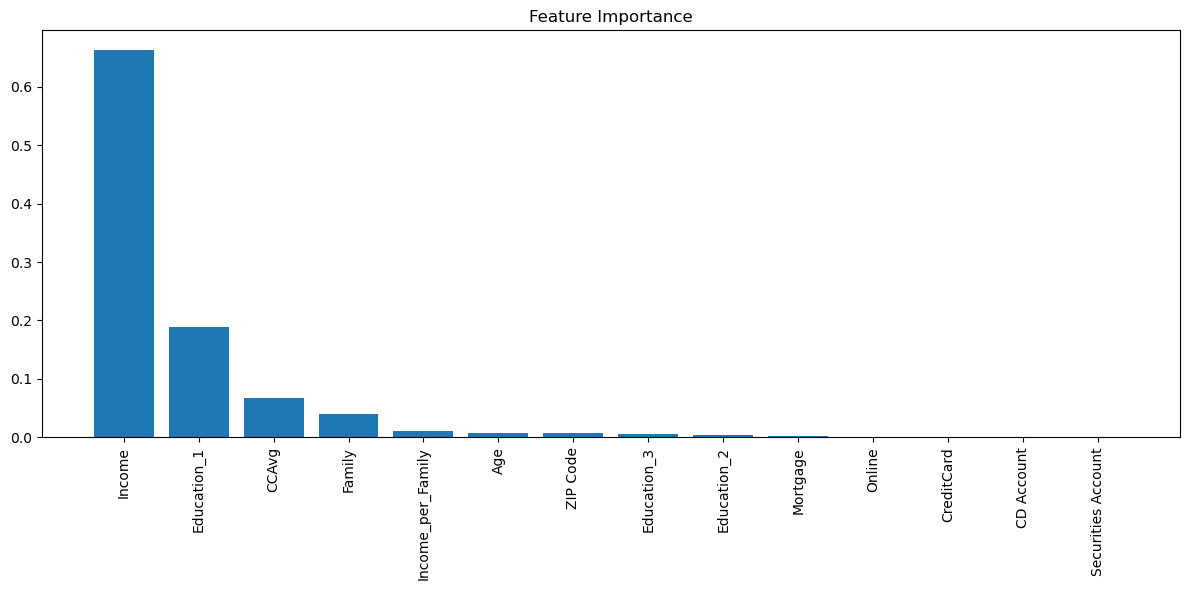

In [42]:
 #Get feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = x_train.columns

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [43]:
 #Select top 7 important features 
selected_features = feature_names[indices][:7]
x_train_smote_selected = x_train_smote[selected_features]
x_test_selected = x_test[selected_features]
x_val_selected = x_val[selected_features]

### Hyperparameter Tuning

In [44]:
 #Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train_smote_selected, y_train_smote)

# Fit final model with best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(x_train_smote_selected, y_train_smote)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2, random_state=42)

*In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org*

*Model Performance:* The decision tree classifier performs well overall, with high accuracy, precision, recall, and F1-scores, especially for the majority class (No Loan). The model also performs reasonably well in identifying the minority class (Loan), with an F1-score of 0.89. However, it still makes some errors (10 false positives and 10 false negatives).

### Random Forest Classifier

In [46]:
# Fit random forest to get feature importances
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

*In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.*

### Feature Selection

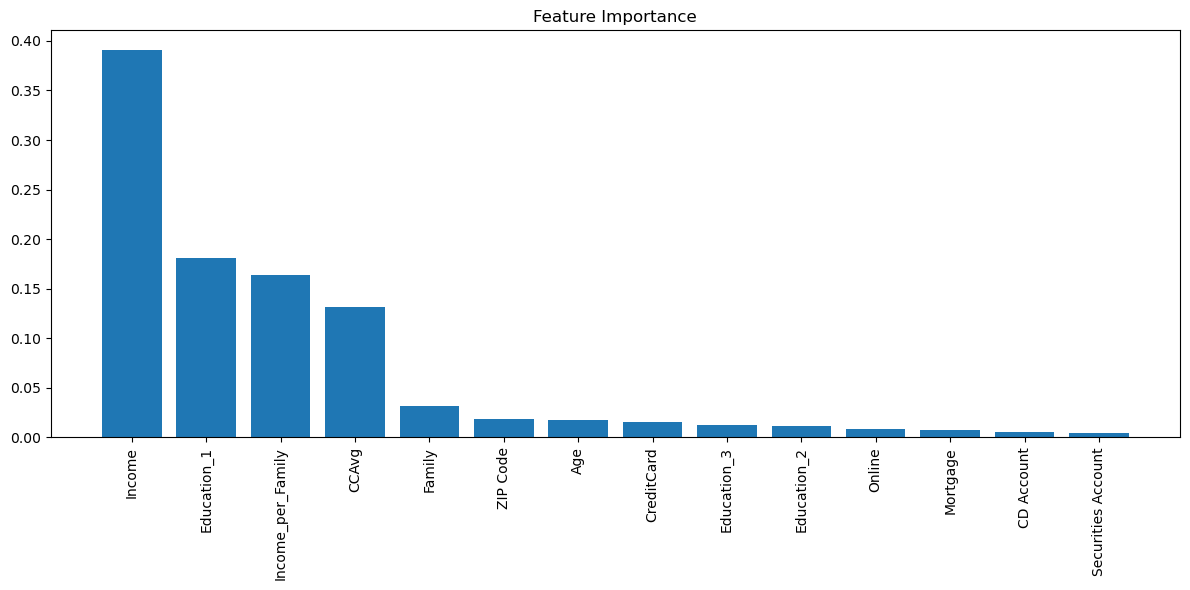

In [48]:
# Get feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = x_train.columns

# Select important features (let's select the top 10 for example)
selected_features = feature_names[indices][:10]
x_train_smote_selected = x_train_smote[selected_features]
x_test_selected = x_test[selected_features]
x_val_selected = x_val[selected_features]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

### Hyperparameter Tuning

In [49]:
 #Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train_smote_selected, y_train_smote)

# Fit final model with best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(x_train_smote_selected, y_train_smote)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


RandomForestClassifier(n_estimators=200, random_state=42)

*In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.*

#### Model Evaluation

Training Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2676
           1       1.00      1.00      1.00      2676

    accuracy                           1.00      5352
   macro avg       1.00      1.00      1.00      5352
weighted avg       1.00      1.00      1.00      5352

Training Confusion Matrix
[[2676    0]
 [   0 2676]]
*********************************************************
Testing Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       891
           1       0.90      0.92      0.91        88

    accuracy                           0.98       979
   macro avg       0.95      0.96      0.95       979
weighted avg       0.98      0.98      0.98       979

Testing Confusion Matrix
[[882   9]
 [  7  81]]
*********************************************************
Validation Classification Report
              precision    recall  

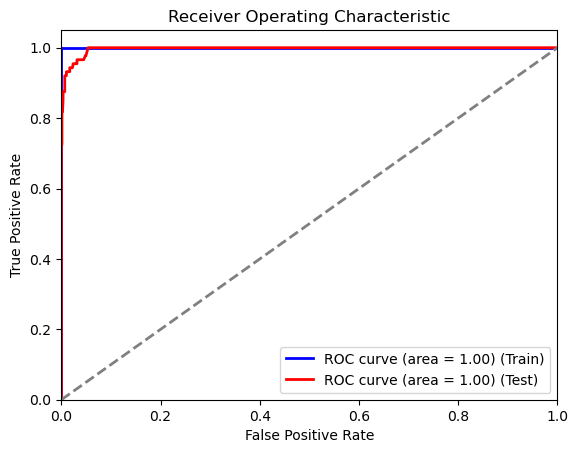

In [51]:
# Evaluate on training and testing data
def evaluate_model(clf, x_train, y_train, x_test, y_test):
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    
    print("Training Classification Report")
    print(classification_report(y_train, y_train_pred))
    print("Training Confusion Matrix")
    print(confusion_matrix(y_train, y_train_pred))
    
    print("*********************************************************")
    
    print("Testing Classification Report")
    print(classification_report(y_test, y_test_pred))
    print("Testing Confusion Matrix")
    print(confusion_matrix(y_test, y_test_pred))
    
    print("*********************************************************")

# Validate the model on the validation set
def validate_model(clf, x_val, y_val):
    y_val_pred = clf.predict(x_val)
    print("Validation Classification Report")
    print(classification_report(y_val, y_val_pred))
    print("Validation Confusion Matrix")
    print(confusion_matrix(y_val, y_val_pred))
    
    print("*********************************************************")

# Evaluation
evaluate_model(best_clf, x_train_smote_selected, y_train_smote, x_test_selected, y_test)
validate_model(best_clf, x_val_selected, y_val)

# ROC Curve
y_train_prob = best_clf.predict_proba(x_train_smote_selected)[:, 1]
y_test_prob = best_clf.predict_proba(x_test_selected)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train_smote, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (area = %0.2f) (Train)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='ROC curve (area = %0.2f) (Test)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Model Performance** The Random Forest classifier demonstrates strong performance across all metrics, with high precision, recall, and F1-scores for both classes. The overall accuracy is 99%, indicating very few errors in prediction. The performance for the minority class (Loan) is particularly noteworthy, with precision and recall both at 0.92, suggesting the model is highly capable of correctly identifying customers who are likely to accept a loan offer. An AUC score of 1.0 means that the classifier perfectly distinguishes between all positive and negative instances. There are no false positives or false negatives, resulting in 100% sensitivity (recall) and 100% specificity.

Compared to the previous decision tree results, the Random Forest classifier shows a slight improvement in identifying the minority class, evidenced by higher recall and precision for Class 1.

### Bagging

In [53]:
# Fit Bagging Classifier to get feature importances (using permutation importance)
base_estimator = DecisionTreeClassifier(random_state=42)
clf = BaggingClassifier(estimator=base_estimator, random_state=42)
clf.fit(x_train_smote, y_train_smote)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  random_state=42)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

### Feature Selection

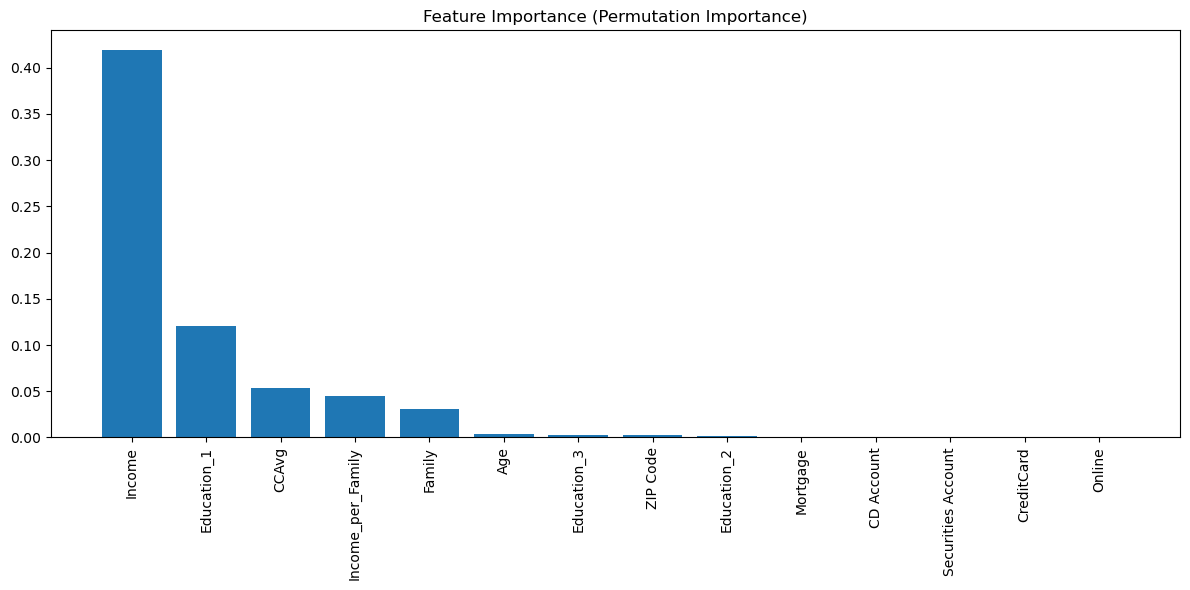

In [55]:
# Feature importance via permutation importance
importances = permutation_importance(clf, x_train_smote, y_train_smote, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = importances.importances_mean.argsort()[::-1]
feature_names = x_train.columns

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importance (Permutation Importance)")
plt.bar(range(x_train.shape[1]), importances.importances_mean[sorted_idx], align='center')
plt.xticks(range(x_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.tight_layout()
plt.show()

# Select important features (let's select the top 10 for example)
selected_features = feature_names[sorted_idx][:10]
x_train_smote_selected = x_train_smote[selected_features]
x_test_selected = x_test[selected_features]
x_val_selected = x_val[selected_features]

In [ ]:
Hperparameter Tuning

In [56]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.8, 0.9, 1.0],
    'max_features': [0.8, 0.9, 1.0],
}

grid_search = GridSearchCV(estimator=BaggingClassifier(estimator=base_estimator, random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train_smote_selected, y_train_smote)

# Fit final model with best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(x_train_smote_selected, y_train_smote)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_features=0.8, max_samples=0.9, n_estimators=200,
                  random_state=42)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

### Model Evaluation

Training Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2676
           1       1.00      1.00      1.00      2676

    accuracy                           1.00      5352
   macro avg       1.00      1.00      1.00      5352
weighted avg       1.00      1.00      1.00      5352

Training Confusion Matrix
[[2676    0]
 [   0 2676]]
*********************************************************

Validation Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       894
           1       0.89      0.94      0.91        85

    accuracy                           0.98       979
   macro avg       0.94      0.96      0.95       979
weighted avg       0.99      0.98      0.98       979

Validation Confusion Matrix
[[884  10]
 [  5  80]]
*********************************************************

Testing Classification Report
              precision    rec

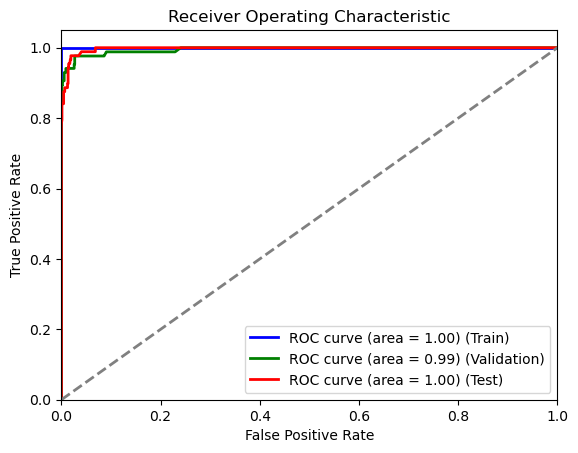

In [58]:
# Evaluate on training and testing data
def evaluate_model(clf, x_train, y_train, x_val, y_val, x_test, y_test):
    y_train_pred = clf.predict(x_train)
    y_val_pred = clf.predict(x_val)
    y_test_pred = clf.predict(x_test)
    
    print("Training Classification Report")
    print(classification_report(y_train, y_train_pred))
    print("Training Confusion Matrix")
    print(confusion_matrix(y_train, y_train_pred))
    
    print("*********************************************************")
    
    print("\nValidation Classification Report")
    print(classification_report(y_val, y_val_pred))
    print("Validation Confusion Matrix")
    print(confusion_matrix(y_val, y_val_pred))
    
    print("*********************************************************")
    
    print("\nTesting Classification Report")
    print(classification_report(y_test, y_test_pred))
    print("Testing Confusion Matrix")
    print(confusion_matrix(y_test, y_test_pred))
    
    print("*********************************************************")
    
    # ROC Curve
    y_train_prob = clf.predict_proba(x_train)[:, 1]
    y_val_prob = clf.predict_proba(x_val)[:, 1]
    y_test_prob = clf.predict_proba(x_test)[:, 1]
    
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    fpr_val, tpr_val, _ = roc_curve(y_val, y_val_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
    
    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_val = auc(fpr_val, tpr_val)
    roc_auc_test = auc(fpr_test, tpr_test)
    
    plt.figure()
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (area = %0.2f) (Train)' % roc_auc_train)
    plt.plot(fpr_val, tpr_val, color='green', lw=2, label='ROC curve (area = %0.2f) (Validation)' % roc_auc_val)
    plt.plot(fpr_test, tpr_test, color='red', lw=2, label='ROC curve (area = %0.2f) (Test)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Evaluation
evaluate_model(best_clf, x_train_smote_selected, y_train_smote, x_val_selected, y_val, x_test_selected, y_test)

**Model Performance** Overall, your model performs exceptionally well, with high precision, recall, and F1-scores, particularly for the majority class (class 0). The performance on the minority class (class 1) is also strong, with a high precision and recall, though there is a slight trade-off. The perfect AUC suggests that the model has excellent discriminative power.

#### XGboost

In [59]:
# Convert 'CCAvg' to numeric if it is a categorical column
data['CCAvg'] = pd.to_numeric(data['CCAvg'], errors='coerce')

x = data.drop('Personal Loan', axis=1)
y = data['Personal Loan']

# Split the data
x_train_test, x_val, y_train_test, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_train_test, y_train_test, test_size=0.25, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [60]:
# Fit XGBoost to get feature importances (using permutation importance)
clf = XGBClassifier(random_state=42)
clf.fit(x_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

### Feature Selection

In [66]:
print(x_train_smote_selected.dtypes)


Income                 int64
Education_1            int32
CCAvg                 object
Income_per_Family    float64
Family                 int64
Age                    int64
Education_3            int32
ZIP Code               int64
Education_2            int32
Mortgage               int64
dtype: object


In [69]:
# Convert CCAvg to float
x_train_smote_selected['CCAvg'] = pd.to_numeric(x_train_smote_selected['CCAvg'], errors='coerce')


In [70]:
x_train_smote_selected['CCAvg'].fillna(x_train_smote_selected['CCAvg'].mean(), inplace=True)


C:\Users\carol M\AppData\Local\Temp\ipykernel_26596\2657806102.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train_smote_selected['CCAvg'].fillna(x_train_smote_selected['CCAvg'].mean(), inplace=True)


In [72]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search.fit(x_train_smote_selected, y_train_smote)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
523 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\carol M\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\carol M\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py", line 1663, in fit
    train_dmatrix, evals = _wrap_

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=1)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

### Model Evaluation

Training Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2676
           1       1.00      1.00      1.00      2676

    accuracy                           1.00      5352
   macro avg       1.00      1.00      1.00      5352
weighted avg       1.00      1.00      1.00      5352

Training Confusion Matrix
[[2676    0]
 [   0 2676]]
************************************************

Validation Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       894
           1       0.89      0.94      0.91        85

    accuracy                           0.98       979
   macro avg       0.94      0.96      0.95       979
weighted avg       0.99      0.98      0.98       979

Validation Confusion Matrix
[[884  10]
 [  5  80]]
************************************************

Testing Classification Report
              precision    recall  f1-score   su

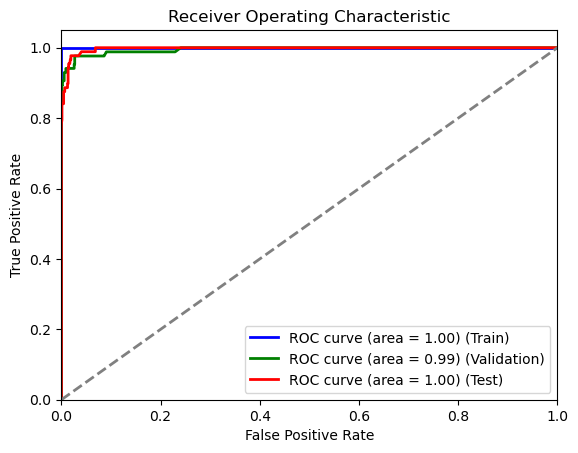

In [74]:
# Evaluate on training and testing data
def evaluate_model(clf, x_train, y_train, x_val, y_val, x_test, y_test):
    y_train_pred = clf.predict(x_train)
    y_val_pred = clf.predict(x_val)
    y_test_pred = clf.predict(x_test)
    
    print("Training Classification Report")
    print(classification_report(y_train, y_train_pred))
    print("Training Confusion Matrix")
    print(confusion_matrix(y_train, y_train_pred))
    print("************************************************")
    
    print("\nValidation Classification Report")
    print(classification_report(y_val, y_val_pred))
    print("Validation Confusion Matrix")
    print(confusion_matrix(y_val, y_val_pred))
    print("************************************************")
    print("\nTesting Classification Report")
    print(classification_report(y_test, y_test_pred))
    print("Testing Confusion Matrix")
    print(confusion_matrix(y_test, y_test_pred))
    
    # ROC Curve
    y_train_prob = clf.predict_proba(x_train)[:, 1]
    y_val_prob = clf.predict_proba(x_val)[:, 1]
    y_test_prob = clf.predict_proba(x_test)[:, 1]
    
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    fpr_val, tpr_val, _ = roc_curve(y_val, y_val_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
    
    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_val = auc(fpr_val, tpr_val)
    roc_auc_test = auc(fpr_test, tpr_test)
    
    plt.figure()
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (area = %0.2f) (Train)' % roc_auc_train)
    plt.plot(fpr_val, tpr_val, color='green', lw=2, label='ROC curve (area = %0.2f) (Validation)' % roc_auc_val)
    plt.plot(fpr_test, tpr_test, color='red', lw=2, label='ROC curve (area = %0.2f) (Test)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Evaluation
evaluate_model(best_clf, x_train_smote_selected, y_train_smote, x_val_selected, y_val, x_test_selected, y_test)

**Model Performance:** XGBoost model also exhibits excellent performance with high precision, recall, and F1-scores for both classes. The perfect AUC of 1 suggests that the model has superb discriminatory ability, making it highly effective for your classification task.

### Conclusion

XGBoost appears to be the best model overall, with the highest precision, recall, and F1-score for class 1. It also has the fewest errors in the confusion matrix. Decision Tree and Random Forest perform similarly, both achieving good precision, recall, and F1-scores, with identical confusion matrices. Bagging also performs well but slightly lags behind XGBoost in terms of recall and F1-score for class 1. Given these results, XGBoost is the recommended model for predicting the likelihood of a customer accepting a personal loan in this dataset. Its higher recall and precision indicate that it is better at identifying potential loan customers while minimizing false positives and negatives, which is crucial for targeted marketing campaigns.

Customers' income levels are the strongest predictor of their likelihood to take a personal loan. Higher income likely correlates with a greater likelihood of accepting a loan offer, perhaps due to better financial stability or confidence in managing debt.

The education level, particularly holding a bachelor's degree, has a notable impact on the likelihood of loan acceptance. This could indicate that individuals with higher education levels are more likely to be in stable, higher-paying jobs, making them more comfortable with taking on loans. Average monthly credit card spending is another important feature, indicating the financial activity level of the customer.

**Recommendations for Thera Bank:**

Since income is the most significant factor, marketing campaigns should prioritize high-income customers. Customized offers and personalized communication can be directed towards this segment. ocus on customers with at least a bachelor's degree, as they show a higher likelihood of accepting personal loans. Marketing messages could highlight benefits relevant to their educational and professional status.

Customers with higher average monthly credit card spending should be targeted. These customers are already engaged in financial activities and might be more open to loan offers.

Implement the XGBoost model in the bank's marketing system to predict potential loan customers. This will help in efficiently identifying and targeting the right customers, improving the success rate of campaigns while keeping costs low.

### BY CAROL RAMOKONE